In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names = ['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
for i in range(10):
    print(df.iloc[i, -1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

In [10]:
# data cleaning

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
sn = SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [21]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
# we need to remove these words from the data

In [23]:
def clean_text(sms):
    sms = sms.lower()

    return sms

In [24]:
clean_text("Get Unlimitted <!!!>,,,, ? Free data 100 GB... at Rs. 0")

'get unlimitted <!!!>,,,, ? free data 100 gb... at rs. 0'

In [28]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z]", ' ', sms)
    sms = nltk.word_tokenize(sms)      # tokenization
    sms = [t for t in sms if len(t) > 1]
#save only those words that are not in stop words
    sms = [word for word in sms if word not in stop]
    
    return sms

In [29]:
clean_text("Get Unlimitted <!!!>,,,, ? Free data 100 GB... at Rs. 0")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ravin/nltk_data'
    - 'C:\\Users\\ravin\\anaconda3\\nltk_data'
    - 'C:\\Users\\ravin\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ravin\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ravin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [31]:
# The error you're encountering indicates that the punkt tokenizer resource is missing from your NLTK installation. 
# You'll need to download it using the NLTK Downloader. Here's how to fix it:

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z]", ' ', sms)
    sms = nltk.word_tokenize(sms)      # tokenization
    sms = [t for t in sms if len(t) > 1]
#save only those words that are not in stop words
    sms = [sn.stem(word) for word in sms if word not in stop]    # Ex: Playing will now be play
    sms = ' '.join(sms)
    return sms

In [40]:
clean_text("Get is are playing they Unlimitted <!!!>,,,, ? Free data play 100 GB... at Rs. 0")

'get play unlimit free data play gb rs'

In [41]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [43]:
df['clean_text'] = df['text'].apply(clean_text)

In [44]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [48]:
# wordcloud

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud

In [50]:
# ham is opposite of spam
# I want to know the most frequent words present in ham

In [54]:
hamdata = df[df ['label'] == 'ham']
hamdata = hamdata['clean_text']

In [55]:
hamdata

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 4825, dtype: object

In [62]:
def wordCloud(data):
    words = ' '.join(data)
    wc = WordCloud(background_color = 'white')  # default color black
    wc = wc.generate(words)

    plt.figure(figsize=(10,8)) # change size
    plt.imshow(wc)
    plt.axis("off") # remove axis
    plt.show()

Ham data words :


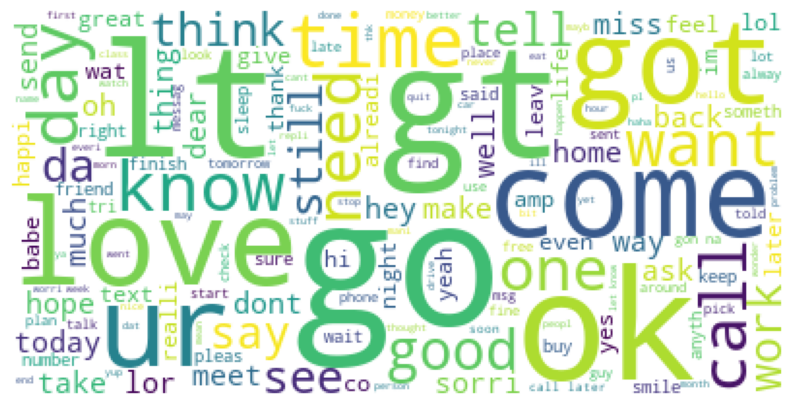

In [64]:
print("Ham data words :")
wordCloud(hamdata)

In [65]:
spamdata = df[df['label'] == 'spam']
spamdata = spamdata['clean_text']

Spam data words :


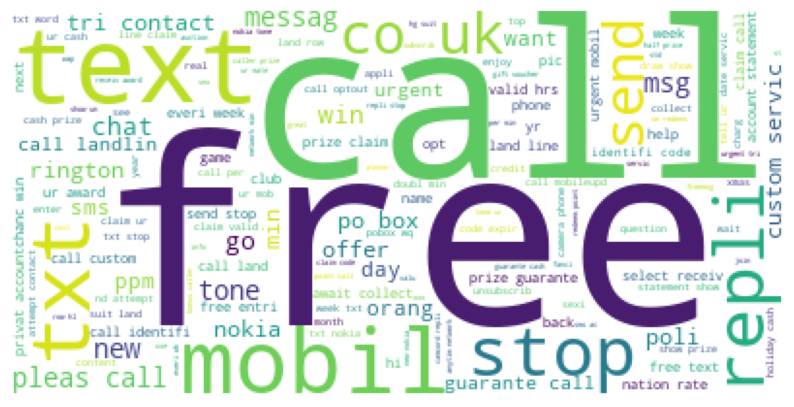

In [66]:
print("Spam data words :")
wordCloud(spamdata)

In [67]:
# Featurization

In [68]:
df

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tri contact pound prize claim easi cal...
5568,ham,Will ü b going to esplanade fr home?,go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [69]:
# convert the clean_text (column in the above table) data to features

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
cv = CountVectorizer(max_features=5000)

In [78]:
X = cv.fit_transform(df['clean_text']).toarray()

In [79]:
X.shape

(5572, 5000)

In [80]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [83]:
pd.get_dummies(df['label'])

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [84]:
y = pd.get_dummies(df['label'])
y = y['spam'].values

In [85]:
y

array([False, False,  True, ..., False, False, False])

In [86]:
# 0 or false is ham and 1 or True is Spam

In [87]:
# Model Building

In [88]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
# because there is a lot of text data and multiple values, we will use MultinomialNB

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
model = MultinomialNB()

In [95]:
model.fit(X_train, y_train)

MultinomialNB()

In [96]:
y_pred = model.predict(X_test)

In [97]:
y_test, y_test

(array([False,  True, False, ..., False,  True, False]),
 array([False,  True, False, ..., False,  True, False]))

In [99]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,False,False


In [100]:
# Model Evaluation

In [101]:
print("Accuracy of training data: ")
print(model.score(X_train, y_train))

Accuracy of training data: 
0.9921471842046219


In [102]:
print("Accuracy of test data: ")
print(model.score(X_test, y_test))

Accuracy of test data: 
0.9856502242152466


In [104]:
# Which means it is not overfitting and the model is performing really well.

In [105]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [106]:
confusion_matrix(y_test, y_pred)

array([[947,   8],
       [  8, 152]], dtype=int64)

In [107]:
# which means, in the test data out of 955, 947 are non-spam/ham.
# 8 in 2nd row indicated the number of mistakes made by the model.
# 8(in first row and 152 in the 2nd row, 8+152 = 160 spam data were present, only 8 (first row) were predicted wrong.

In [108]:
y_test.shape

(1115,)

In [109]:
# so out of the 1115 values only 16 values were predicted as false.

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.95      0.95      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [111]:
f1_score(y_test, y_pred)

0.95

In [ ]:
# F1 score of 95 is good. F1 score is a metric that measures how well a model can classify data.